<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

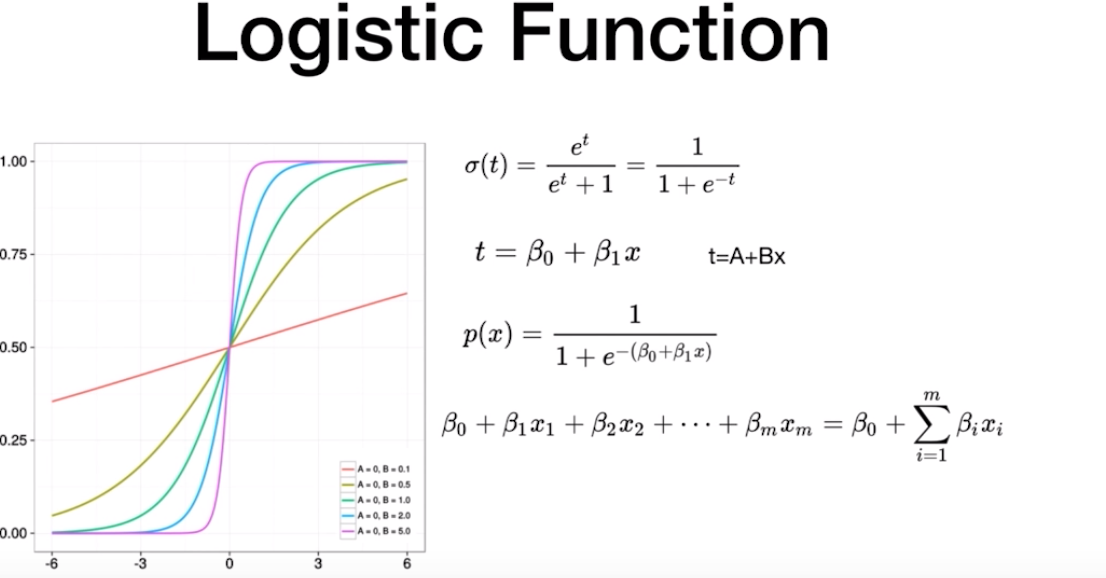

In [144]:
import pandas as pd
veriler = [
    ['tr', 130, 30, 10, 'e'],
    ['tr', 125, 36, 11, 'e'],
    ['tr', 135, 34, 10, 'k'],
    ['tr', 133, 30, 9, 'k'],
    ['tr', 129, 38, 12, 'e'],
    ['tr', 180, 90, 30, 'e'],
    ['tr', 190, 80, 25, 'e'],
    ['tr', 175, 90, 35, 'e'],
    ['tr', 177, 60, 22, 'k'],
    ['us', 185, 105, 33, 'e'],
    ['us', 165, 55, 27, 'k'],
    ['us', 155, 50, 44, 'k'],
    ['us', 160, 58, None, 'k'],
    ['us', 162, 59, 41, 'k'],
    ['us', 167, 62, 55, 'k'],
    ['fr', 174, 70, 47, 'e'],
    ['fr', 193, 90, None, 'e'],
    ['fr', 187, 80, 27, 'e'],
    ['fr', 183, 88, 28, 'e'],
    ['fr', 159, 40, 29, 'k'],
    ['fr', 164, 66, 32, 'k'],
    ['fr', 166, 56, 42, 'k']
]

# Verileri bir veri çerçevesine yükleyin
veri_cercevesi = pd.DataFrame(veriler, columns=['Ülke', 'Boy', 'Kilo', 'Yaş', 'Cinsiyet'])

# Veri çerçevesini gösterin
print(veri_cercevesi)
veri_cercevesi.to_csv('veriler.csv', index=False)



   Ülke  Boy  Kilo   Yaş Cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k


DATA PROCESSİNG


In [145]:

data=pd.read_csv('veriler.csv')
data


,Ülke,Boy,Kilo,Yaş,Cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [146]:
data.shape

(22, 5)

In [147]:
#veride null degerler varmı nasıl kodntrol edili
cauntNull=data.isnull().sum()
print(cauntNull)


Ülke        0
Boy         0
Kilo        0
Yaş         2
Cinsiyet    0
dtype: int64


In [148]:

from sklearn.impute import SimpleImputer
import numpy as np
imputer= SimpleImputer(missing_values=np.nan,strategy='mean')
Yas=data.iloc[:,1:4].values

imputer =imputer.fit(Yas[:,1:4])
Yas[:,1:4]=imputer.transform(Yas[:,1:4])
print(Yas)

[[130.    30.    10.  ]
 [125.    36.    11.  ]
 [135.    34.    10.  ]
 [133.    30.     9.  ]
 [129.    38.    12.  ]
 [180.    90.    30.  ]
 [190.    80.    25.  ]
 [175.    90.    35.  ]
 [177.    60.    22.  ]
 [185.   105.    33.  ]
 [165.    55.    27.  ]
 [155.    50.    44.  ]
 [160.    58.    28.45]
 [162.    59.    41.  ]
 [167.    62.    55.  ]
 [174.    70.    47.  ]
 [193.    90.    28.45]
 [187.    80.    27.  ]
 [183.    88.    28.  ]
 [159.    40.    29.  ]
 [164.    66.    32.  ]
 [166.    56.    42.  ]]


In [149]:
#YASDAKİ NULL DEGERLERİ DÜZENMENMİŞ VEİRLER
lastData2=pd.DataFrame(data=Yas,index=range(22),columns=["boy","kilo","yas"])
lastData2


,boy,kilo,yas
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [150]:
ilk_sutun = data.iloc[:, 0]  # İlk sütun
son_sutun = data.iloc[:, -1]  # Son sütun


In [151]:
s=pd.concat([ilk_sutun,lastData2,son_sutun],axis=1)
s
veriler=s

BOY KİLO YAŞDAN CİNSİYET TAHMİNİ


In [152]:
import pandas as pd

veriler = pd.DataFrame(veriler)  # Listeyi DataFrame'e dönüştürme
x = veriler.iloc[:, 1:4]  # Şimdi "iloc" yöntemini kullanabilirsiniz
x
# bağımsız değişkenler

,boy,kilo,yas
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [153]:
y=veriler.iloc[:,4:]
y
# bağımlı değişken

,Cinsiyet
0,e
1,e
2,k
3,k
4,e
5,e
6,e
7,e
8,k
9,e


In [154]:
# verileri eğitim ve test veri seti olarak ayırma
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [155]:
# veriliern ölçeklendirilmesi:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# eğitim setinide fit ile : modeli öğren transform ile : öğrenileni uygula
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test) # test veri seti üstünde eğitim yapma modeli uygula


In [156]:
X_train

array([[ 0.45049444, -0.29657884, -0.24717129],
       [ 1.00824945,  0.5096549 ,  0.03416189],
       [ 1.13696215,  0.91277178,  0.35769504],
       [-1.6089087 , -1.18343596, -1.18494855],
       [-1.35148331, -1.34468271, -1.372504  ],
       [ 0.57920713,  0.91277178,  0.50305051],
       [ 0.87953676,  0.5096549 ,  0.22171734],
       [ 0.79372829,  1.51744708,  0.78438369],
       [ 0.36468597,  0.91277178,  0.97193914],
       [ 0.70791983,  0.8321484 ,  0.31549506],
       [-1.43729177, -1.50592946, -1.46628173],
       [-1.56600447, -1.50592946, -1.372504  ],
       [ 0.32178174,  0.10653803,  2.09727185],
       [-0.27887751, -0.37720222,  0.35769504]])

In [157]:
y_train=y_train.values
y_train

array([['k'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['e'],
       ['e'],
       ['k']], dtype=object)

LOGISTIC REGRESYON

In [159]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['e', 'e', 'e', 'e', 'k', 'e', 'e', 'e'], dtype=object)

In [160]:
y_test

,Cinsiyet
20,k
10,k
14,k
13,k
1,e
21,k
11,k
19,k
